In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('t2.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-18,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-18,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-18,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-18,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-18,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.shape

(2035, 8)

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [13]:
df1 = df.reset_index()['Close']

In [14]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [15]:
df1.shape

(2035,)

Text(0.5, 1.0, 'Closing graph of stock market')

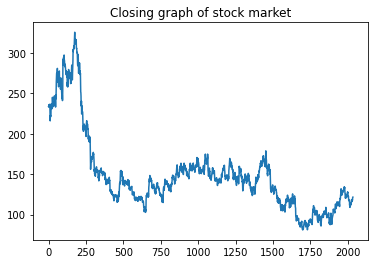

In [17]:
plt.plot(df1)
plt.title('Closing graph of stock market')

In [18]:
df1.min()

80.95

In [19]:
df1.max()

325.75

In [21]:
df1.describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

In [22]:
#using min max scaler to put the values in a suitable range

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
ms = MinMaxScaler()

In [44]:
train_size = len(df11)*0.80

In [45]:
len(df11)

2035

In [46]:
train_size

1628.0

In [47]:
train_size = int(train_size)

In [48]:
train_size

1628

In [49]:
test_size = len(df11) - train_size

In [50]:
type(test_size)

int

In [51]:
df11 = ms.fit_transform(np.array(df1).reshape(-1,1))

In [55]:
train_data = df11[0:train_size,:]
test_data = df11[train_size:len(df11),:]

In [56]:
df11

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [58]:

def select_data(df11, time_step=1):
    dataX, dataY = [], []
    for i in range(len(df11)-time_step-1):
        dataX.append(df11[i:(i+time_step), 0])
        dataY.append(df11[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [59]:
timestep = 200

X_train, y_train = select_data(train_data, timestep)
X_test, y_test = select_data(test_data, timestep)

In [60]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(timestep,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()
model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 50,batch_size = 32, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 200, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 200, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [62]:
train_predict = model.predict(train_data)
test_predict = model.predict(test_data)


13/13 [==============================] - 0s 3ms/step


In [64]:
train_predict = ms.inverse_transform(train_predict)
test_predict = ms.inverse_transform(test_predict)

In [65]:
train_predict

array([[146.84773],
       [146.73898],
       [146.95656],
       ...,
       [123.43951],
       [123.02659],
       [123.42152]], dtype=float32)

In [67]:
import math

In [71]:
t = timestep

p1 = np.empty_like(df1)       #train-pred-plot
p1[:,:] =np.nan
p1[t : len(train_predict)+t , : ] =  train_predict
p2 = np.empty_like(df1)       #test-pred-plot
p2[:,:] =np.nan
p2[ len(train_predict)+ t*2 + 1 : len(df1) -1 , : ] =  test_predict

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed